# Real Image Phase Retrieval

## Read Image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [4]:
einstein_img = imread('einstein.jpg')

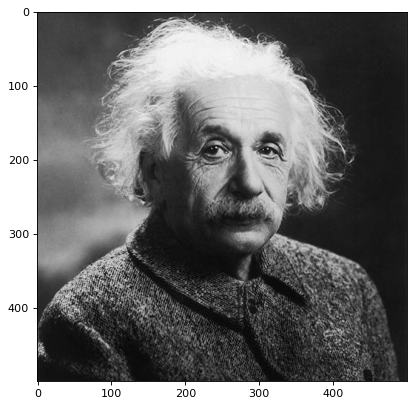

In [5]:
plt.figure(num=None, figsize=(8,6), dpi=80)
plt.imshow(einstein_img, cmap='gray')

## Fourier Transform

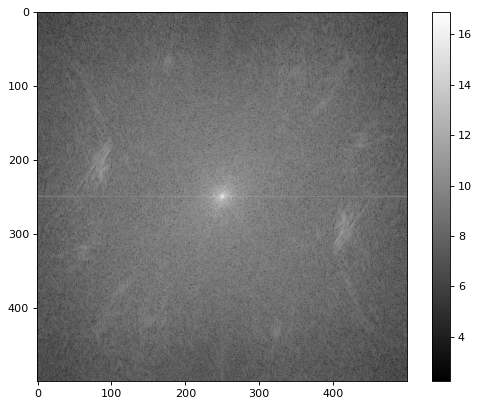

In [6]:
einstein_fourier = np.fft.fftshift(np.fft.fft2(einstein_img))
plt.figure(num=None, figsize=(8,6), dpi=80)
plt.imshow(np.log(abs(einstein_fourier)), cmap='gray')
plt.colorbar()

## Reveal the effect of distortions

There are two distortions:
1. Vertical line
2. Horizontal line

### Vertical Distortion

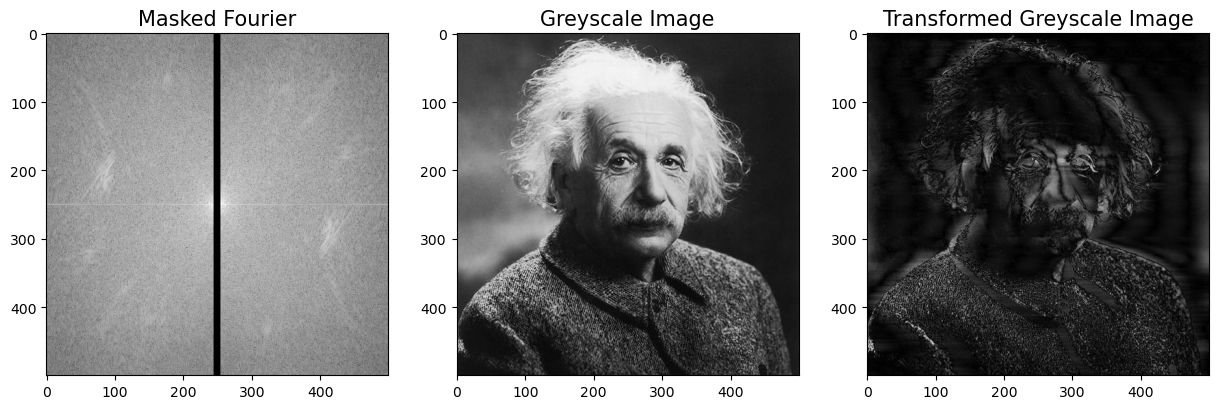

In [7]:
def fourier_masker_ver(image, i):
    f_size = 15
    einstein_fourier = np.fft.fftshift(np.fft.fft2(image))
    
    einstein_fourier[:250, 245:255] = i
    einstein_fourier[-250:,245:255] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(einstein_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(einstein_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size);
    
fourier_masker_ver(einstein_img, 1)

### Horizontal Distortion

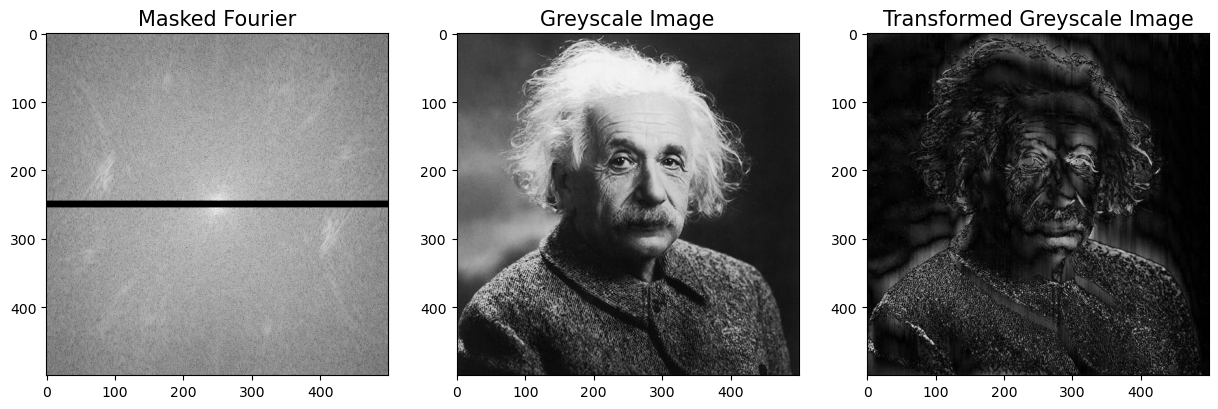

In [8]:
def fourier_masker_hor(image, i):
    f_size = 15
    einstein_fourier = np.fft.fftshift(np.fft.fft2(image))
    
    einstein_fourier[245:255, :250] = i
    einstein_fourier[245:255, -250:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(einstein_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(einstein_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size);
    
fourier_masker_hor(einstein_img, 1)